**Ejercicio**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
data = pd.read_csv('train.csv')

# Descripcion de los datos
print(data.head())
print(data.info())
print(data.describe())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [8]:
# Las columnas con muchos valores nulos se eliminan
print(data.isnull().sum().sort_values(ascending=False).head(10))

PoolQC         2909
MiscFeature    2814
Alley          2721
Fence          2348
MasVnrType     1766
SalePrice      1459
FireplaceQu    1420
LotFrontage     486
GarageCond      159
GarageYrBlt     159
dtype: int64


In [9]:
# Eliminacion de columnas con muchos valores nulos
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)
data = data.dropna()
print(data.isnull().sum().sum())

0


In [10]:
# Comvertir variable categórica 'Neighborhood' en numérica usando target encoding
neighborhood_mean = data.groupby('Neighborhood')['SalePrice'].mean()

data['Neighborhood_encoded'] = data['Neighborhood'].map(neighborhood_mean)

print(data[['Neighborhood', 'Neighborhood_encoded']].head(10))

   Neighborhood  Neighborhood_encoded
2       CollgCr         248422.208333
4       NoRidge         337386.357143
6       Somerst         267961.100000
11      NridgHt         325178.409091
13      CollgCr         248422.208333
20      NridgHt         325178.409091
22      CollgCr         248422.208333
25      NridgHt         325178.409091
27      NridgHt         325178.409091
34      NridgHt         325178.409091


In [11]:
# Seleccionando las variables dependientes e independientes
variables = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
    'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
    '1stFlrSF', 'BsmtFinSF1', 'Neighborhood_encoded'
]

X = data[variables]
y = data['SalePrice']

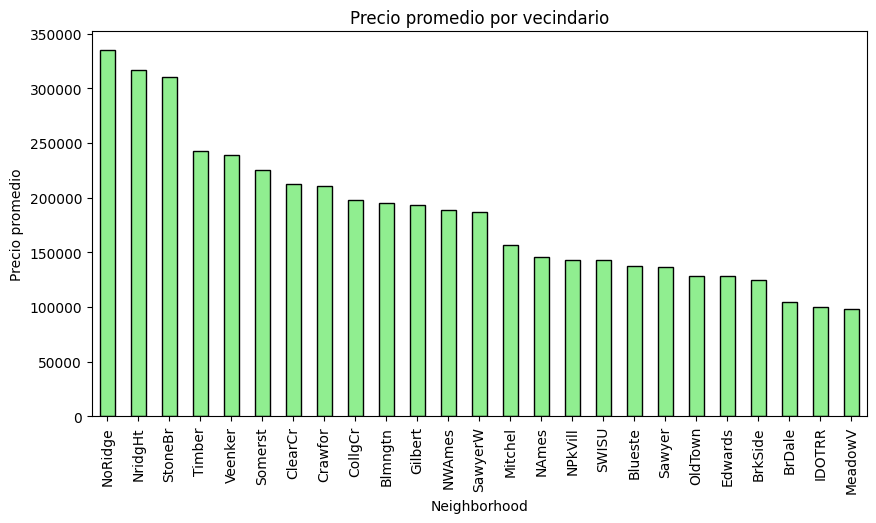

In [ ]:
# Casas mas caras dependiendo el barrio
price_by_neigh = data.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
price_by_neigh.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Precio promedio por vecindario')
plt.xlabel('Neighborhood')
plt.ylabel('Precio promedio')
plt.xticks(rotation=90)
plt.show()

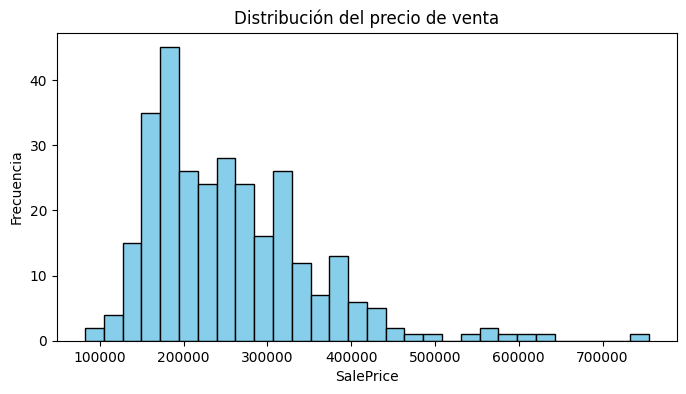

In [12]:
# Casas dependiendo de la frecuencia de compra por valor
plt.figure(figsize=(8,4))
plt.hist(data['SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del precio de venta')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.show()

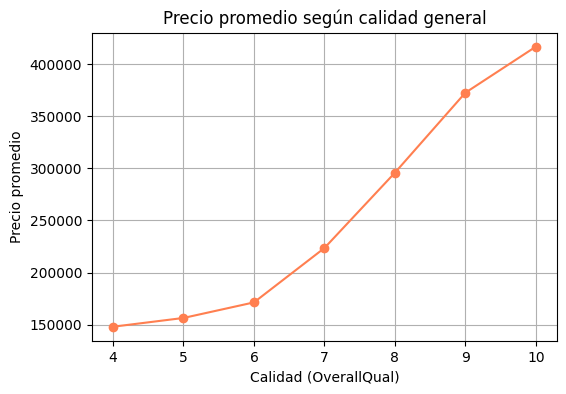

In [13]:
# Las casas que son mejores para vivir, pero por comparacion sus precios y niveles de modernas

mean_price_by_qual = data.groupby('OverallQual')['SalePrice'].mean()

plt.figure(figsize=(6,4))
plt.plot(mean_price_by_qual.index, mean_price_by_qual.values, marker='o', color='coral')
plt.title('Precio promedio según calidad general')
plt.xlabel('Calidad (OverallQual)')
plt.ylabel('Precio promedio')
plt.grid(True)
plt.show()

In [14]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#  escalamiento de características
escala = StandardScaler()
X_train_scaled = escala.fit_transform(X_train)
X_test_scaled = escala.transform(X_test)

In [16]:
# Entrenamiento del modelo de regresión lineal

modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# Modelo de prediccion
y_pred = modelo.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.3f}")

RMSE: 55031.90
MAE: 38660.01
R²: 0.728


In [18]:
#Guardado en un archivo csv la prediccion
pred_df = pd.DataFrame({
    "Id": X_test.index[:3],
    "SalePrice": y_pred[:3]
})

pred_df.to_csv("predicciones.csv", index=False)
print("Archivo 'predicciones.csv' generado con éxito")

Archivo 'predicciones.csv' generado con éxito
